### Multiple Regression

In [75]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import sklearn.metrics as metrics
import scipy.stats as stats

In [76]:
"""The following code opens our modified dataset for model processing. It then drops the necessary columns. We then convert the variables Year, Month, Wea into objective 
variables so the model can identify them as categorical"""
ocean = pd.read_csv('ocean17.csv', index_col=0)
ocean['Salnty'] = ocean['Salnty']
ocean['O2ml_L'] = ocean['O2ml_L']
ocean['Lat_Dec'] = ocean['Lat_Dec']
ocean['Lon_Dec'] = ocean['Lon_Dec']
ocean['Bottom_D'] = ocean['Bottom_D']
ocean['Depthm'] = ocean['Depthm']

columns_to_drop = ['Wind_Dir','STheta','T_degC']
ocean = ocean.drop(columns=columns_to_drop)
ocean[['Wea','Year', 'Month']] = ocean[[ 'Wea','Year', 'Month']].astype('object')

ocean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 765355 to 830772
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Salnty    2000 non-null   float64
 1   Depthm    2000 non-null   int64  
 2   O2ml_L    2000 non-null   float64
 3   Year      2000 non-null   object 
 4   Month     2000 non-null   object 
 5   Lat_Dec   2000 non-null   float64
 6   Lon_Dec   2000 non-null   float64
 7   Bottom_D  2000 non-null   float64
 8   Wea       2000 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 156.2+ KB


In [77]:
df = ocean.copy()
dummies = pd.get_dummies(df, drop_first=True)

dummies

/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_96788/785365793.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df, drop_first=True)
/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_96788/785365793.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df, drop_first=True)
/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_96788/785365793.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df, drop_first=True)


,Salnty,Depthm,O2ml_L,Lat_Dec,Lon_Dec,Bottom_D,Year_2005,Year_2006,Year_2007,Year_2008,...,Month_7,Month_8,Month_9,Month_10,Month_11,Wea_1.0,Wea_2.0,Wea_3.0,Wea_4.0,Wea_6.0
765355,34.155,500,0.70,31.318333,-123.745000,3935.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765398,34.148,200,2.08,33.418333,-117.901666,635.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765400,34.184,250,1.75,33.418333,-117.901666,635.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765402,34.259,300,1.20,33.418333,-117.901666,635.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765405,34.301,400,0.70,33.418333,-117.901666,635.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817760,34.108,250,1.45,36.053333,-122.018333,1339.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
817762,34.166,300,1.12,36.053333,-122.018333,1339.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
817765,34.191,400,0.72,36.053333,-122.018333,1339.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
817767,34.255,500,0.40,36.053333,-122.018333,1339.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [78]:
""" A multi regression model is fit."""
x = dummies.iloc[:, 1:]
y = dummies.iloc[:, :1]
# Add a constant term to the independent variables
x = sm.add_constant(x)

# Fit the multiple regression model
model = sm.OLS(y, x).fit()

# Display the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Salnty   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     538.4
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:35:23   Log-Likelihood:                 3308.5
No. Observations:                2000   AIC:                            -6561.
Df Residuals:                    1972   BIC:                            -6404.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.8404      0.118    304.325      0.0

In [79]:
""" Outlier are identified based on Cooks Distance"""

inf = model.get_influence()
C, _ = inf.cooks_distance

# Set a threshold for Cook's distance
threshold = 4 / len(y)

# Identify outliers based on Cook's distance
outliers = np.where(C > threshold)[0]

# Print the indices of outliers identified by Cook's distance
print("Indices of outliers identified by Cook's distance:")
print(np.where(C > threshold)[0])


Indices of outliers identified by Cook's distance:
[  59   64  278  361  362  431  432  439  521  640  814  815 1050 1215
 1232 1294 1315 1316 1320 1321 1338 1339 1340 1341 1342 1349 1406 1447
 1475 1476 1477 1488 1489 1548 1581 1583 1595 1600 1621 1759 1764 1874
 1927 1929 1935 1936 1938 1939 1949 1955 1959 1960 1973 1977 1978 1979
 1982 1984 1985 1986 1992 1993 1994 1997 1999]


/Users/pranaylingareddy/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:848: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


In [80]:
dummies

,Salnty,Depthm,O2ml_L,Lat_Dec,Lon_Dec,Bottom_D,Year_2005,Year_2006,Year_2007,Year_2008,...,Month_7,Month_8,Month_9,Month_10,Month_11,Wea_1.0,Wea_2.0,Wea_3.0,Wea_4.0,Wea_6.0
765355,34.155,500,0.70,31.318333,-123.745000,3935.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765398,34.148,200,2.08,33.418333,-117.901666,635.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765400,34.184,250,1.75,33.418333,-117.901666,635.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765402,34.259,300,1.20,33.418333,-117.901666,635.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765405,34.301,400,0.70,33.418333,-117.901666,635.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817760,34.108,250,1.45,36.053333,-122.018333,1339.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
817762,34.166,300,1.12,36.053333,-122.018333,1339.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
817765,34.191,400,0.72,36.053333,-122.018333,1339.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
817767,34.255,500,0.40,36.053333,-122.018333,1339.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [81]:
dummies_nooutlier = dummies.reset_index(drop=True)
subset_indices = [59, 64, 278, 351, 361, 362, 431, 432, 439, 472, 640, 814, 815, 1049,
1050, 1215, 1232, 1294, 1315, 1316, 1317, 1320, 1321, 1335, 1336, 1339,
1340, 1341, 1342, 1349, 1406, 1447, 1477, 1488, 1489, 1543, 1548, 1580,
1581, 1600, 1621, 1759, 1764, 1799, 1803, 1874, 1927, 1929, 1931, 1935,
1936, 1938, 1939, 1949, 1955, 1957, 1958, 1959, 1960, 1973, 1976, 1977,
1978, 1981, 1982, 1984, 1985, 1986, 1992, 1993, 1994, 1995, 1999]
dummies_nooutlier = dummies_nooutlier.drop(subset_indices)

In [82]:

dummies_nooutlier

,Salnty,Depthm,O2ml_L,Lat_Dec,Lon_Dec,Bottom_D,Year_2005,Year_2006,Year_2007,Year_2008,...,Month_7,Month_8,Month_9,Month_10,Month_11,Wea_1.0,Wea_2.0,Wea_3.0,Wea_4.0,Wea_6.0
0,34.155,500,0.70,31.318333,-123.745000,3935.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,34.148,200,2.08,33.418333,-117.901666,635.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,34.184,250,1.75,33.418333,-117.901666,635.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,34.259,300,1.20,33.418333,-117.901666,635.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,34.301,400,0.70,33.418333,-117.901666,635.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,34.303,600,0.26,35.955000,-123.841667,3877.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1991,34.319,700,0.23,35.955000,-123.841667,3877.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1996,34.166,300,1.12,36.053333,-122.018333,1339.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1997,34.191,400,0.72,36.053333,-122.018333,1339.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [83]:
"""The following code splits into predictor variables (x) 
and the target variable (y). Then the data is split into 80% of the data is used for training (x_train and y_train) 
and 20% is used for testing (x_test and y_test). Finally, a multi regression model is fit."""

x = dummies_nooutlier.iloc[:, 1:]
y = dummies_nooutlier.iloc[:, :1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

mlr = LinearRegression()  
mlr.fit(x_train, y_train)

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 Salnty   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     831.4
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:35:24   Log-Likelihood:                 3850.1
No. Observations:                1927   AIC:                            -7648.
Df Residuals:                    1901   BIC:                            -7504.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.8333      0.085    422.083      0.0

In [84]:
""" The code is evaluating the performance of the linear regression model using various metrics"""
y_pred = mlr.predict(x_test)
x = dummies_nooutlier.iloc[:, 1:]


meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R squared: {:.2f}'.format(mlr.score(x, y) * 100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 91.60
Mean Absolute Error: 0.023862513001853998
Mean Square Error: 0.0009263812080929079
Root Mean Square Error: 0.030436511102504962


In [85]:
from sklearn.model_selection import train_test_split, cross_val_score
"""This code preforms a 5 k-fold validaton """
# Split the data into features (x) and target variable (y)
x = dummies_nooutlier.iloc[:, 1:]
y = dummies_nooutlier.iloc[:, :1]
# Split the data into training, validation, and testing sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=100)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=100)

# Linear Regression Model Fitting using scikit-learn
mlr = LinearRegression()

# Combine training and validation sets for cross-validation
x_combined = pd.concat([x_train, x_val], axis=0)
y_combined = pd.concat([y_train, y_val], axis=0)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(mlr, x_combined, y_combined, cv=5, scoring='r2')

# Train the model on the combined training and validation sets
mlr.fit(x_combined, y_combined)

# Model performance on training set
train_r2 = mlr.score(x_train, y_train) * 100
train_meanAbErr = metrics.mean_absolute_error(y_train, mlr.predict(x_train))
train_meanSqErr = metrics.mean_squared_error(y_train, mlr.predict(x_train))
train_rootMeanSqErr = np.sqrt(train_meanSqErr)

print('Training Set Performance:')
print('R squared: {:.2f}'.format(train_r2))
print('Mean Absolute Error:', train_meanAbErr)
print('Mean Squared Error:', train_meanSqErr)
print('Root Mean Squared Error:', train_rootMeanSqErr)

# Model performance on testing set
test_r2 = mlr.score(x_test, y_test) * 100
test_meanAbErr = metrics.mean_absolute_error(y_test, mlr.predict(x_test))
test_meanSqErr = metrics.mean_squared_error(y_test, mlr.predict(x_test))
test_rootMeanSqErr = np.sqrt(test_meanSqErr)

print('\nTesting Set Performance:')
print('R squared: {:.2f}'.format(test_r2))
print('Mean Absolute Error:', test_meanAbErr)
print('Mean Squared Error:', test_meanSqErr)
print('Root Mean Squared Error:', test_rootMeanSqErr)

# Cross-validation scores
print('\nCross-Validation Scores:')
print('R squared scores:', cv_scores)
print('Average R squared: {:.2f}'.format(np.mean(cv_scores) * 100))

# Calculate and print cross-validated Mean Squared Error
cv_mse_scores = cross_val_score(mlr, x_combined, y_combined, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_mse_scores  # Multiply by -1 to get positive MSE scores
print('Mean Squared Error scores:', cv_mse_scores)
print('Average Mean Squared Error: {:.4f}'.format(np.mean(cv_mse_scores)))


Training Set Performance:
R squared: 91.41
Mean Absolute Error: 0.025801754865161744
Mean Squared Error: 0.0010882890754326923
Root Mean Squared Error: 0.0329892266570875

Testing Set Performance:
R squared: 91.82
Mean Absolute Error: 0.026017687868848057
Mean Squared Error: 0.0011103222118863689
Root Mean Squared Error: 0.03332149774374449

Cross-Validation Scores:
R squared scores: [0.90990272 0.91314754 0.90417106 0.91492714 0.92307735]
Average R squared: 91.30
Mean Squared Error scores: [0.00109854 0.00115187 0.00113723 0.0011006  0.00102164]
Average Mean Squared Error: 0.0011


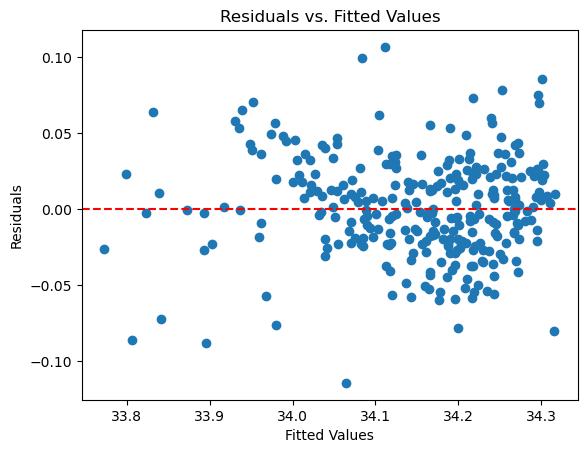

In [86]:
""" This code produces a Residuals vs. Fitted Values plot """

# Get the predicted values
y_pred = mlr.predict(x_test)

# Calculate residuals
residuals = residuals = y_test - y_pred


# Plotting
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

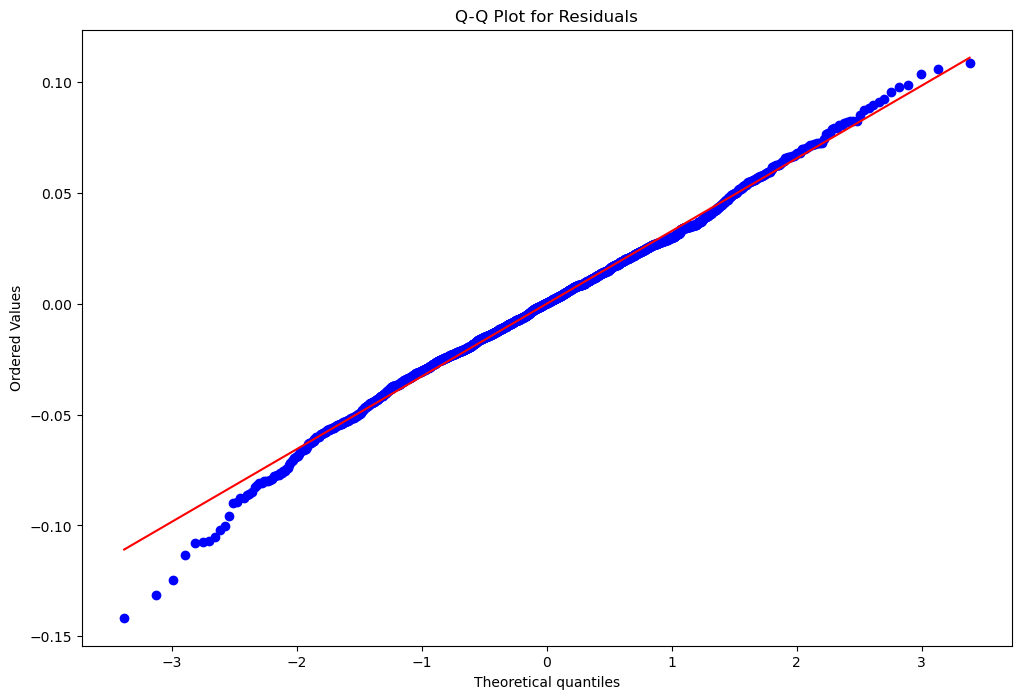

In [87]:
""" This code produces a Q-Q plot for Residuals """

residuals = model.resid

# Combine residuals for all predictor columns
std_resid = residuals 

# Q-Q plot
plt.figure(figsize=(12, 8))
probplot(std_resid, plot=plt)
plt.title('Q-Q Plot for Residuals')
plt.show()


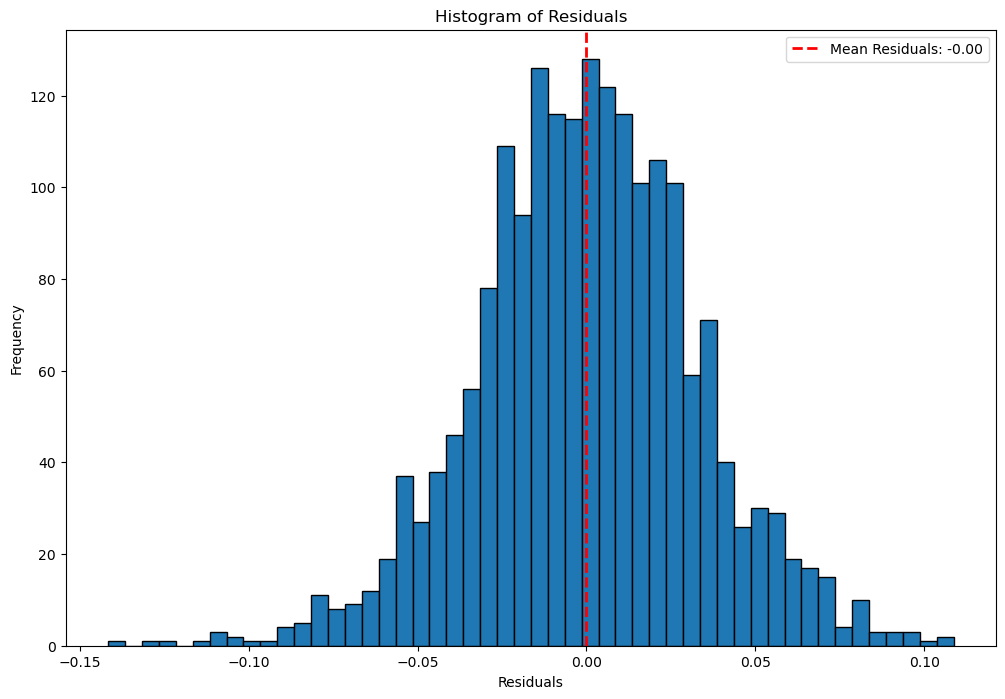

In [88]:
"Code creates a Histogram of residuals"

# Assuming 'model' is your linear regression model
residuals = model.resid

plt.figure(figsize=(12, 8))
plt.hist(residuals, bins=50, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Calculate and plot the mean of residuals
mean_residuals = residuals.mean()
plt.axvline(x=mean_residuals, color='red', linestyle='dashed', linewidth=2, label=f'Mean Residuals: {mean_residuals:.2f}')

plt.legend()
plt.show()


In [89]:
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

# Add a constant term to the predictor matrix
x_train = sm.add_constant(x_train)

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = x_train.columns
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

# Display VIF values
print("VIF values:")
print(vif_data)

VIF values:
     Variable           VIF
0       const  12307.039044
1      Depthm      3.860131
2      O2ml_L      4.368181
3     Lat_Dec      1.739413
4     Lon_Dec      3.582247
5    Bottom_D      3.768244
6   Year_2005      3.216199
7   Year_2006      3.932953
8   Year_2007      3.475072
9   Year_2008      1.022893
10  Year_2009           NaN
11  Year_2010      1.797939
12  Year_2011      1.490188
13  Year_2012           NaN
14    Month_2      2.227109
15    Month_3      1.147107
16    Month_4      2.203816
17    Month_6      1.209508
18    Month_7      2.710927
19    Month_8           NaN
20    Month_9      1.502570
21   Month_10      1.736595
22   Month_11      2.379774
23    Wea_1.0      2.529484
24    Wea_2.0      2.639693
25    Wea_3.0      1.024832
26    Wea_4.0      1.309095
27    Wea_6.0      1.046500


/Users/pranaylingareddy/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
